# Simple Ridge regression..

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# creating data for linear Regression using sklearn's make_regression..
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<function matplotlib.pyplot.show(close=None, block=None)>

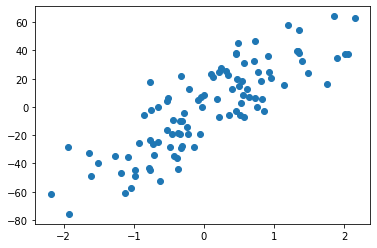

In [14]:
plt.scatter(X,y)
plt.show

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [5]:
# Ridge Regression with Alpha = 0, is nothing but the Linear Regression itself.
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
# performing Ridge regression with alpha = 10
rr = Ridge(alpha = 10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [15]:
# performing Ridge regression with alpha = 100
rr1 = Ridge(alpha = 100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


<function matplotlib.pyplot.show(close=None, block=None)>

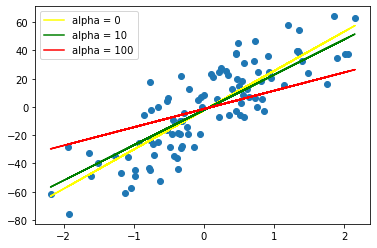

In [16]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), color='yellow', label='alpha = 0')
plt.plot(X,rr.predict(X), color='green', label='alpha = 10')
plt.plot(X,rr1.predict(X), color='red', label='alpha = 100')
plt.legend()
plt.show

#### As you can see Ridge with alpha=10 gives slightly more accuracy than normal Linear Regression, whereas Ridge with alpha=100 deviated from the actual solution.
#### so, we have to be carefull on choosing appropiate value of alpha while performing ridge regression.

## Writing our own Ridge Regression Class from the Scratch.

In [17]:
class MyRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None;
        self.b = None
    def fit(self, X, y):
        num = 0
        den = 0
        for i in range(X.shape[0]):
            num = num + (y[i] - y.mean()) * (X[i] - X.mean())
            den = den + (X[i] - X.mean()) * (X[i] - X.mean())
            
        self.m = num / (den + self.alpha)
        self.b = y.mean() - self.m * X.mean()
        print(self.m, self.b)
        
    def predict(X):
        pass

In [12]:
rr2 = MyRidge(alpha = 10)
rr2.fit(X, y)

[24.9546267] [-2.126913]


#### you can see that the coefficient and the intercept obtained from MyRidge() class is same as that was obtained from Sklearn's own Ridge() class